# 25.02.19 데이터분석 (by KYJ)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from add_remaining_useful_life import add_remaining_useful_life

# 시각화를 위한 스타일 설정
plt.style.use('seaborn')
sns.set_palette("husl")

# 데이터 경로 설정
dir_path = './CMAPSSData/'

# 컬럼명 정의
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1, 22)]
col_names = index_names + setting_names + sensor_names

# 데이터 로드
train_df = pd.read_csv(dir_path + 'train_FD001.txt', sep='\s+', header=None, names=col_names)
test_df = pd.read_csv(dir_path + 'test_FD001.txt', sep='\s+', header=None, names=col_names)
y_test = pd.read_csv(dir_path + 'RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])

# RUL 추가
train_df_with_rul = add_remaining_useful_life(train_df)

/tmp/ipykernel_730315/3927920004.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [9]:
# 학습 데이터의 기본 정보 확인
print("Training Data Information:")
print(train_df_with_rul.info())
print("\nSample of training data:")
print(train_df_with_rul.head())

# 기술통계량 확인
print("\nDescriptive Statistics:")
print(train_df_with_rul.describe())

# 결측치 확인
print("\nMissing Values:")
# print(train_df_with_rul.isnull().sum())
# 전부 출력하는게 아니라 있으면 그것만 출력 
print(train_df_with_rul.isnull().sum()[train_df_with_rul.isnull().sum() > 0])

Training Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_nr      20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   s_1          20631 non-null  float64
 6   s_2          20631 non-null  float64
 7   s_3          20631 non-null  float64
 8   s_4          20631 non-null  float64
 9   s_5          20631 non-null  float64
 10  s_6          20631 non-null  float64
 11  s_7          20631 non-null  float64
 12  s_8          20631 non-null  float64
 13  s_9          20631 non-null  float64
 14  s_10         20631 non-null  float64
 15  s_11         20631 non-null  float64
 16  s_12         20631 non-null  float64
 17  s_13         20631 non-null  float64
 18  s_14         20631 non-n

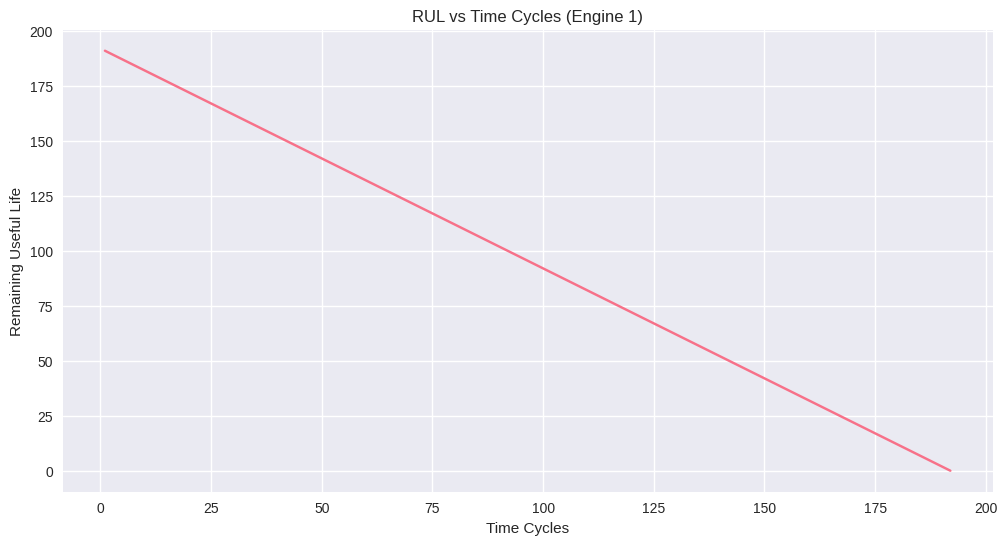

In [10]:
# 1. 시간에 따른 RUL 변화 (첫 번째 엔진)
plt.figure(figsize=(12, 6))
first_engine = train_df_with_rul[train_df_with_rul['unit_nr'] == 1]
plt.plot(first_engine['time_cycles'], first_engine['RUL'])
plt.title('RUL vs Time Cycles (Engine 1)')
plt.xlabel('Time Cycles')
plt.ylabel('Remaining Useful Life')
plt.show()


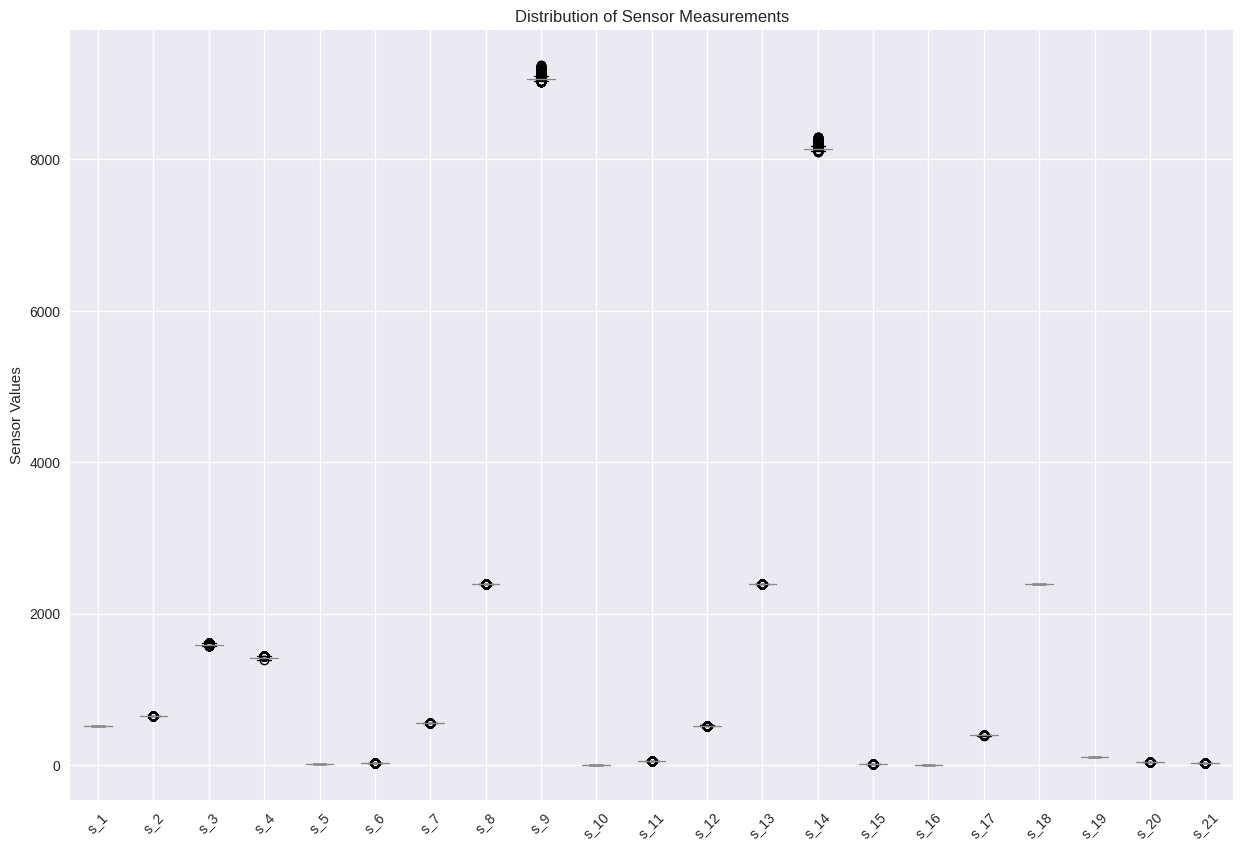

In [ ]:
# 2. 센서 측정값들의 분포
plt.figure(figsize=(15, 10))
train_df_with_rul[sensor_names].boxplot()
plt.xticks(rotation=45)
plt.title('Distribution of Sensor Measurements')
plt.ylabel('Sensor Values')
plt.show()


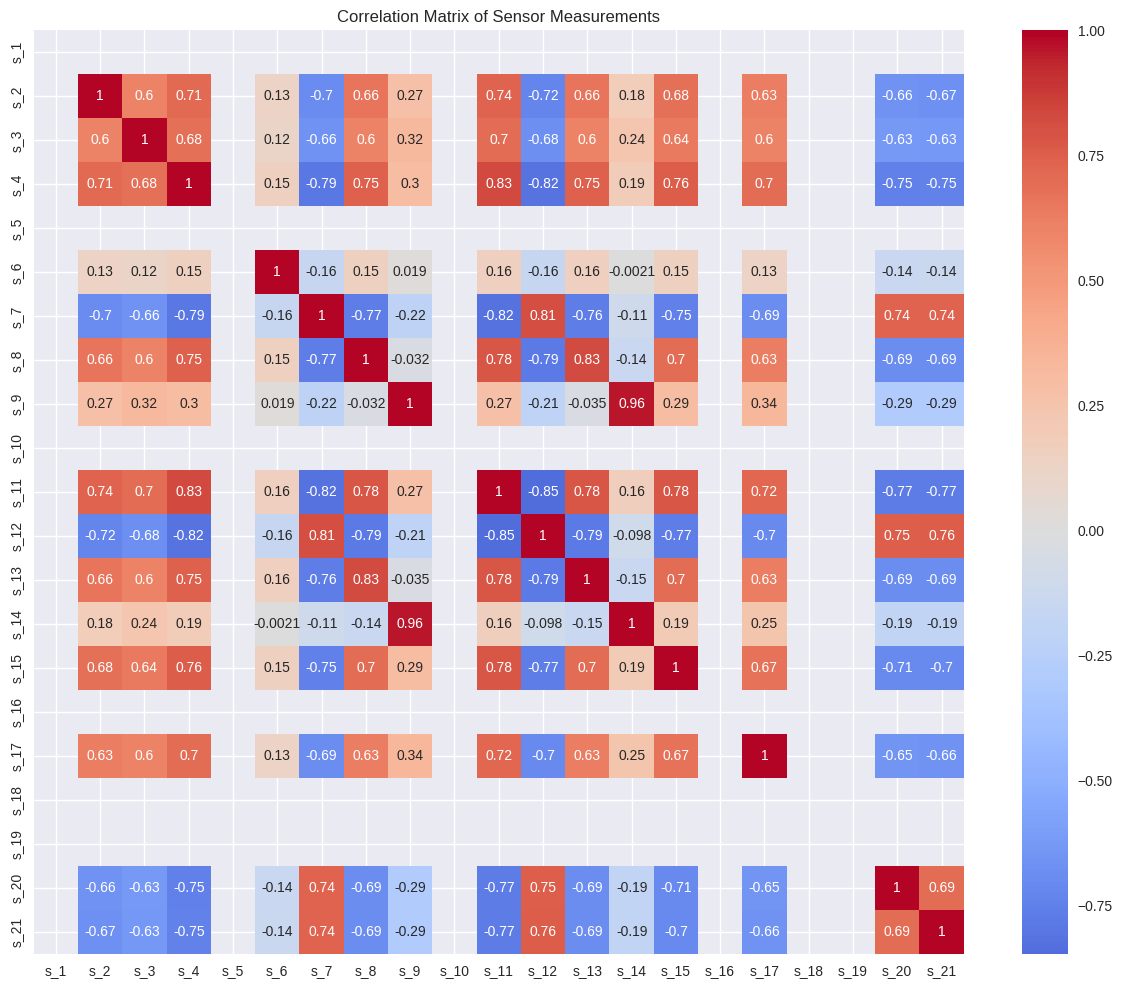

In [12]:
# 3. 센서 간의 상관관계
plt.figure(figsize=(15, 12))
correlation_matrix = train_df_with_rul[sensor_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Sensor Measurements')
plt.show()